# Volume Dataset Analysis

In this exercise you will be analyzing a DICOM dataset. This dataset is not as conveniently organized on the filesystem as some of the datasets we have seen in the lesson just now. Rather, this dataset looks like somethign that you are likely to get as a raw dump from a clinical data archive.  

Your task is to use the skills you have acquired in this lesson to go through this dataset and answer (or provide your best quess to) the following questions:
1. What imaging modality was used to produce this dataset?
1. Data from how many patients does the dataset include?
1. How many studies are in the dataset?
1. What is the oldest and most recent study in the dataset?
1. How many series are in the dataset?

In addition, do the following tasks:

1. List voxel dimensions of all 3D volumes (i.e. series) that the dataset contains as WxHxD
1. The dataset contains two outliers. Can you find them? Type up why do you think these volumes are outliers.

<TYPE YOUR ANSWERS HERE>

In [1]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

In [2]:
# Let's use the same code as in the walkthrough to load data

path = r"data"
dirs = np.array([[(os.path.join(dp, f), pydicom.dcmread(os.path.join(dp, f), stop_before_pixels = True)) for f in files]
                   for dp,_,files in os.walk(path) if len(files) != 0])

In [3]:
# How many directories?

len(dirs)

1

In [4]:
instances = dirs[0]
len(instances)

864

In [5]:
series_uids = np.unique([inst[1].SeriesInstanceUID for inst in instances])
len(series_uids)

32

In [6]:
studies_uids = np.unique([inst[1].StudyInstanceUID for inst in instances])
len(studies_uids)

10

In [7]:
patient_ids = [inst[1].PatientID for inst in instances]
print(patient_ids)

['PGBM-005', '123456', 'PGBM-005', 'PGBM-005', 'PGBM-003', 'PGBM-003', 'PGBM-005', 'PGBM-003', 'PGBM-004', 'PGBM-009', '123456', 'PGBM-005', '123456', '123456', 'PGBM-005', 'PGBM-009', 'PGBM-005', 'PGBM-003', 'PGBM-009', '123456', '123456', 'OPA135179', 'PGBM-004', 'PGBM-003', 'OPA135179', 'PGBM-003', 'PGBM-003', 'PGBM-009', 'PGBM-005', 'PGBM-009', 'PGBM-004', 'PGBM-004', '123456', '123456', 'PGBM-003', 'PGBM-005', 'PGBM-003', 'PGBM-009', 'PGBM-004', '123456', 'PGBM-005', 'PGBM-004', 'PGBM-009', 'PGBM-004', '123456', 'PGBM-005', 'PGBM-009', 'PGBM-009', 'PGBM-005', 'PGBM-009', 'PGBM-004', 'PGBM-004', '123456', 'PGBM-004', 'PGBM-003', 'PGBM-004', 'PGBM-003', '123456', 'PGBM-009', '123456', 'PGBM-005', 'PGBM-009', 'PGBM-004', 'PGBM-004', 'PGBM-003', 'PGBM-005', 'PGBM-005', 'PGBM-003', 'PGBM-003', 'PGBM-003', 'PGBM-005', 'PGBM-003', 'PGBM-003', 'PGBM-003', 'PGBM-005', 'PGBM-003', 'PGBM-005', 'PGBM-003', 'PGBM-003', 'PGBM-003', 'PGBM-004', 'PGBM-004', 'PGBM-009', 'PGBM-005', 'OPA135179', 'P

In [8]:
patients_ids_uq = np.unique(patient_ids)
print(f"Number of patients: {len(patients_ids_uq)}, patient IDs: {patients_ids_uq}")

Number of patients: 6, patient IDs: ['123456' 'OPA135179' 'PGBM-003' 'PGBM-004' 'PGBM-005' 'PGBM-009']


In [9]:
# Create hash of all modalities for individual series

series_uids_modality_map = {uid: s[1].Modality for uid in series_uids for s in instances if s[1].SeriesInstanceUID == uid }

In [10]:
series_uids_modality_map

{'1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286': 'CT',
 '1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.105521800202421035670670758706': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.108708982094690934070899838243': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.111299569371716382165219422799': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.131971402732874033229609248302': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.137802635701410656176169562528': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.148342356080268980546237840587': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.149455479236394071679725178532': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.158869091666854803918782490935': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.165843183220097757648432257390': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.167613564536106399232524912048': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.170099978014836890431312652906': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.

In [11]:
# First, load the pixel data - remember that we didn't load it for the sake of speed

slices_ct = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].SeriesInstanceUID == "1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286"]

slices_mr1 = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].SeriesInstanceUID == list(series_uids_modality_map.items())[4][0]]

slices_mr2 = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].SeriesInstanceUID == list(series_uids_modality_map.items())[9][0]]

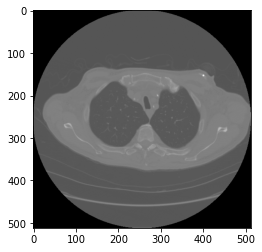

In [12]:
plt.imshow(slices_ct[10].pixel_array, cmap="gray")

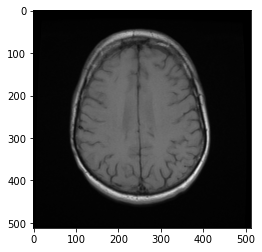

In [13]:
plt.imshow(slices_mr1[10].pixel_array, cmap="gray")

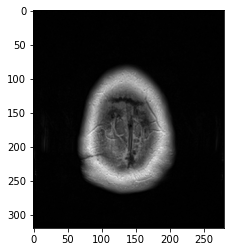

In [14]:
plt.imshow(slices_mr2[10].pixel_array, cmap="gray")

In [15]:
study_dates = sorted(np.unique([inst[1].StudyDate for inst in instances]))
study_dates

['19880512',
 '19910103',
 '19910702',
 '19920505',
 '19930622',
 '19940112',
 '19950329',
 '19951017',
 '20150116',
 '20190101']

In [16]:
print(np.unique([inst[1].StudyDate for inst in instances if inst[1].Modality == "CT"]))

['20190101']


In [18]:
slices_odd_mr = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].StudyDate == "20150116"]

In [19]:
# Let's check how many series we have in this study:

print(np.unique([s.SeriesInstanceUID for s in slices_odd_mr]))
print(len(slices_odd_mr))

['1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0']
36


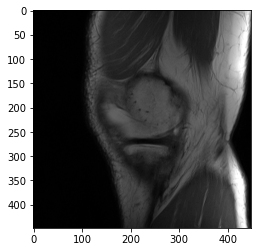

In [20]:
plt.imshow(slices_odd_mr[15].pixel_array, cmap="gray")

In [21]:
volumes = dict()

for inst in instances:
    sid = inst[1].SeriesInstanceUID
    if (sid not in volumes):
        volumes[sid] = dict()
        
    volumes[sid]["StudyDate"] = inst[1].StudyDate
    volumes[sid]["Width"] = inst[1].Columns
    volumes[sid]["Height"] = inst[1].Rows
    volumes[sid]["PatientId"] = inst[1].PatientID
    
    if ("slice_count" not in volumes[sid]):
        volumes[sid]["slice_count"] = 0
    else:
        volumes[sid]["slice_count"] += 1

In [22]:
volumes

{'1.3.6.1.4.1.14519.5.2.1.4429.7055.167613564536106399232524912048': {'StudyDate': '19910702',
  'Width': 260,
  'Height': 320,
  'PatientId': 'PGBM-005',
  'slice_count': 23},
 '1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286': {'StudyDate': '20190101',
  'Width': 512,
  'Height': 512,
  'PatientId': '123456',
  'slice_count': 138},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.292260123189044684287428848596': {'StudyDate': '19910702',
  'Width': 260,
  'Height': 320,
  'PatientId': 'PGBM-005',
  'slice_count': 23},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.105521800202421035670670758706': {'StudyDate': '19950329',
  'Width': 280,
  'Height': 320,
  'PatientId': 'PGBM-003',
  'slice_count': 21},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.170099978014836890431312652906': {'StudyDate': '19950329',
  'Width': 280,
  'Height': 320,
  'PatientId': 'PGBM-003',
  'slice_count': 21},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.108708982094690934070899838243': {'StudyDate': '19920505',
  'Width': 280,
  'He

In [23]:
# Or, more concisely:
for _,v in volumes.items():
    print(f"{v['Width']}x{v['Height']}x{v['slice_count']}  ")

260x320x23  
512x512x138  
260x320x23  
280x320x21  
280x320x21  
280x320x21  
512x512x23  
512x512x22  
512x512x21  
280x320x21  
512x512x21  
280x320x21  
260x320x24  
448x448x35  
512x512x21  
512x512x23  
280x320x21  
260x320x24  
260x320x23  
512x512x21  
280x320x21  
260x320x24  
280x320x21  
512x512x21  
512x512x22  
512x512x22  
512x512x23  
512x512x23  
512x512x21  
260x320x23  
512x512x21  
512x512x22  


# Answers
So, to summarize, here are the answers to our questions and solutions to our tasks:

1) What imaging modality was used to produce this dataset? </br>
</br> Mostly MRI, one CT

2) Data from how many patients does the dataset include?</br>
</br> 6 patients

3) How many studies are in the dataset? </br>
</br> 10 studies

4) What are the oldest and the most recent studies in the dataset? </br>
</br> The oldest study is May 12, 1988, most recent one is Jan 1 2019

5) How many series are in the dataset?</br>
</br> There are 32 series

6) List voxel dimensions of all 3D volumes (i.e. series) that the dataset contains as WxHxD </br>
</br> 512x512x138

448x448x35</br>
280x320x21</br>
280x320x21</br>
280x320x21</br>
280x320x21</br>
512x512x23</br>
512x512x23</br>
512x512x23</br>
512x512x23</br>
512x512x22</br>
512x512x22</br>
512x512x22</br>
512x512x22</br>
512x512x21</br>
512x512x21</br>
512x512x21</br>
512x512x21</br>
280x320x21</br>
280x320x21</br>
280x320x21</br>
280x320x21</br>
260x320x23</br>
260x320x23</br>
260x320x23</br>
260x320x23</br>
260x320x24</br>
260x320x24</br>
260x320x24</br>
512x512x21</br>
512x512x21</br>
512x512x21</br>

7) The dataset contains two outliers. Can you find them? There is more than one way to find them. Type up why do you think these volumes are outliers and what approach you used. </br>
</br> We have two series:

Series UID 1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286: that is a CT series, and a different anatomy </br>
Series UID 1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0: that is very different data range, and looks like different anatomy